# **Part 1: Data Loading and Initial Exploration**

## 1.1 Dataset Overview

In [64]:
from google.colab import drive
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount("/content/drive")
df = pd.read_csv('/content/drive/MyDrive/Datasets/young-people-survey-responses.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
df.shape

# Dimensions of data: 1010 rows x 16 columns

(1010, 16)

In [66]:
df.head(5)

# Table showing first 5

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village


In [67]:
df.info()

# Summary of data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1010 non-null   int64  
 1   Music            1007 non-null   float64
 2   Techno           1003 non-null   float64
 3   Movies           1004 non-null   float64
 4   History          1008 non-null   float64
 5   Mathematics      1007 non-null   float64
 6   Pets             1006 non-null   float64
 7   Spiders          1005 non-null   float64
 8   Loneliness       1009 non-null   float64
 9   Parents' advice  1008 non-null   float64
 10  Internet usage   1010 non-null   object 
 11  Finances         1007 non-null   float64
 12  Age              1003 non-null   float64
 13  Siblings         1004 non-null   float64
 14  Gender           1004 non-null   object 
 15  Village - town   1006 non-null   object 
dtypes: float64(12), int64(1), object(3)
memory usage: 126.4+ KB


## 1.2 Initial Data Quality

The target variable is **Loneliness**  

In [68]:
# Summary table of missing values per column
df.isnull().sum()

,0
Unnamed: 0,0
Music,3
Techno,7
Movies,6
History,2
Mathematics,3
Pets,4
Spiders,5
Loneliness,1
Parents' advice,2


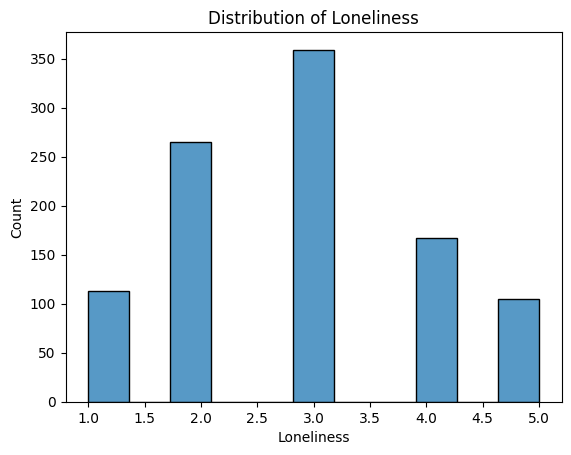

In [69]:
# sns.barplot doesn't look very useful
# for looking at the 'distribution'
# of 1 variable
sns.histplot(data=df['Loneliness'])
plt.title('Distribution of Loneliness')
plt.show()

#**Part 2: Exploratory Data Analysis (EDA)**

## 2.1 Univariate Analysis : Numerical  

I have a hard time distinguishing the 'key variables' since they all had such low correlations. But with the correlations/heatmap, the highest were Spiders and Age being close ties, and then Music  






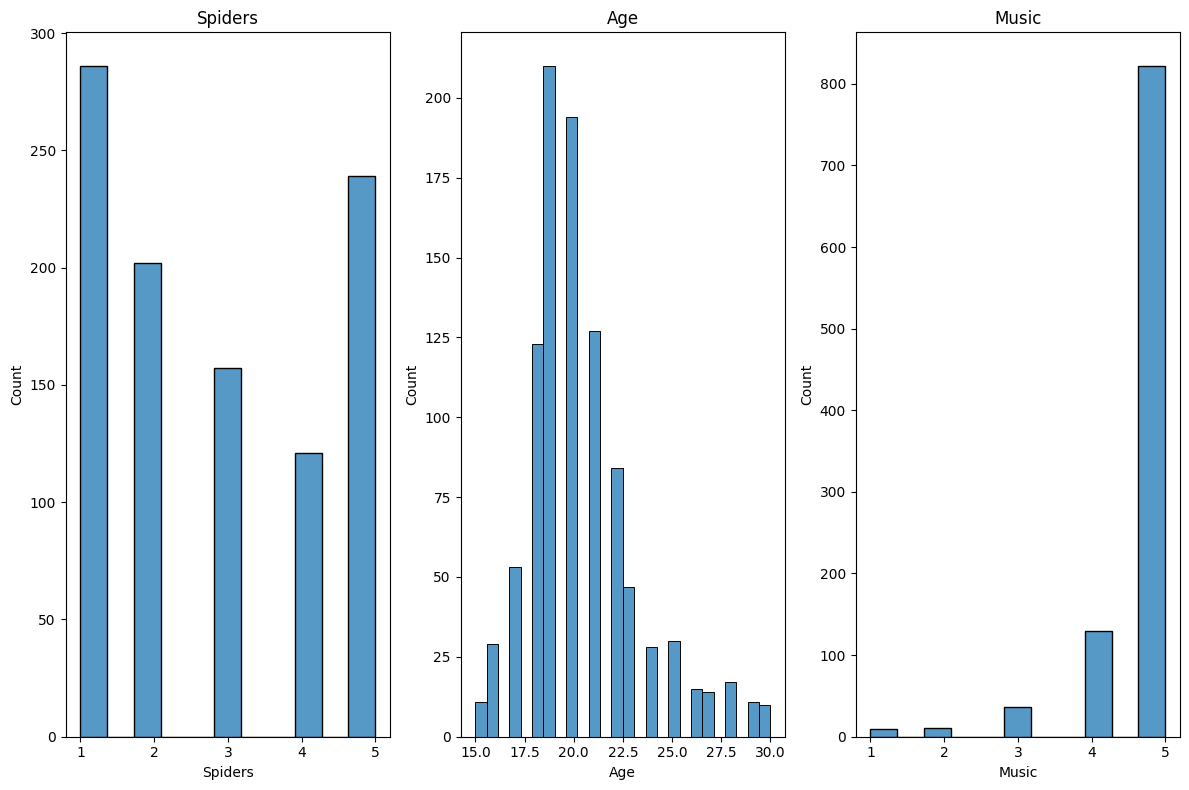

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

sns.histplot(data=df['Spiders'], ax=ax[0])
ax[0].set_title('Spiders')

sns.histplot(data=df['Age'], ax=ax[1])
ax[1].set_title('Age')

sns.histplot(data=df['Music'], ax=ax[2])
ax[2].set_title('Music')

plt.tight_layout()
plt.show()

^Figure Caption:  
The histogram for Music shows its high skewness, Age looks roughly normal, and Spiders seem to have a slight bimodal distribution.

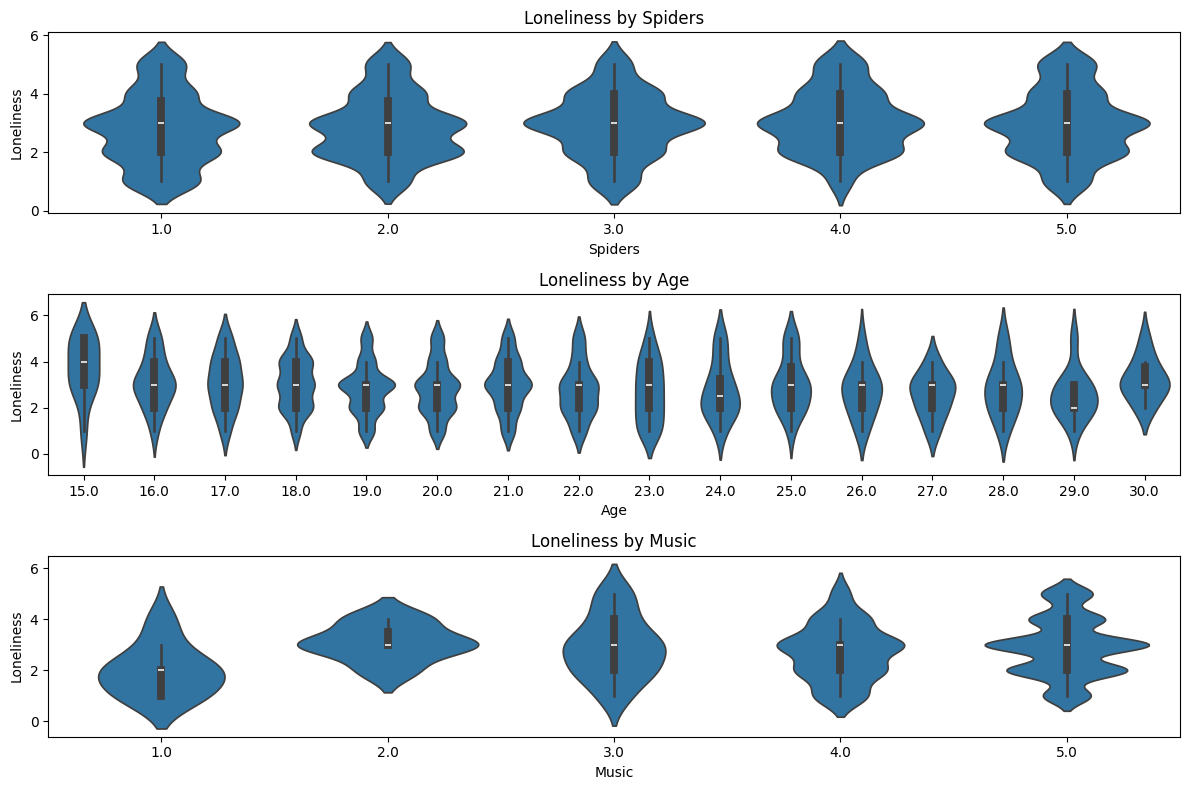

In [71]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8))

sns.violinplot(data=df, x='Spiders', y='Loneliness', ax=ax[0])
ax[0].set_title('Loneliness by Spiders')

sns.violinplot(data=df, x='Age', y='Loneliness', ax=ax[1])
ax[1].set_title('Loneliness by Age')

sns.violinplot(data=df, x='Music', y='Loneliness', ax=ax[2])
ax[2].set_title('Loneliness by Music')

plt.tight_layout()
plt.show()

^Figure Caption:  
They all generally have regular shapes, with the bulbs being near the middle of their respective boxplot. Though, the Age-15 group's bulb is higher-- around 4.  

Age will undergo a feature scaling process later, simply because its values are of a significantly larger scale than other variables in the data.

## 2.1 Univariate Analysis : Categorical  

There were only 3 "categorical" (object type) variables. With what I mentioned above, I'd say they're variables that are as "key" as this low-correlation dataset can be


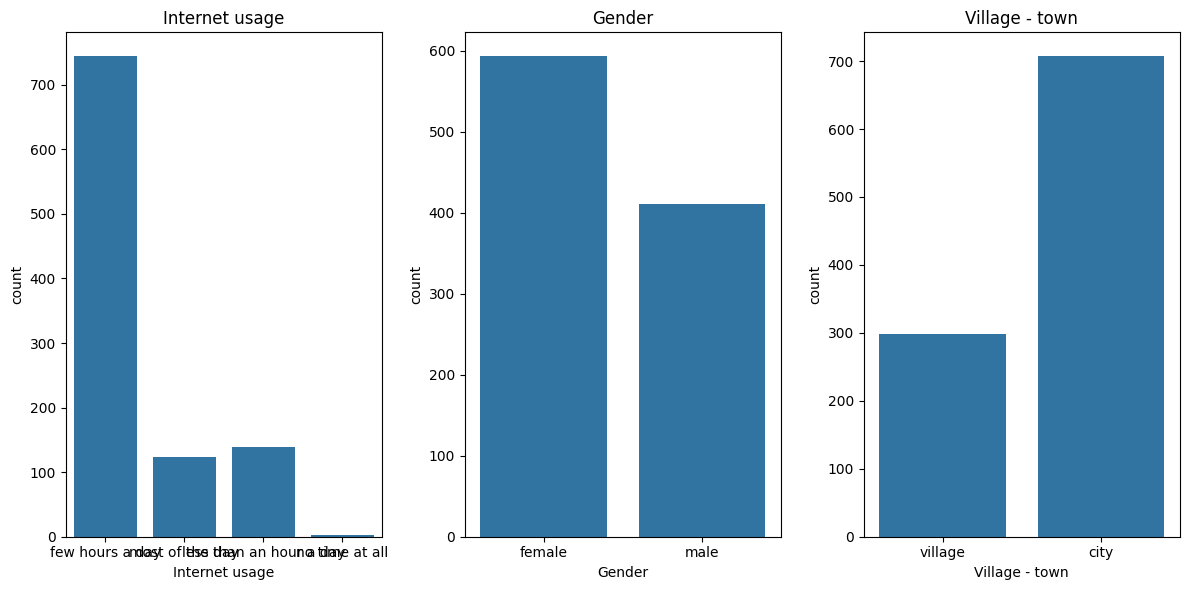

In [72]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

for col, subplot_ax in zip(cat_cols, ax):
    sns.countplot(data=df, x=col, ax=subplot_ax)
    subplot_ax.set_title(col)

plt.tight_layout()
plt.show()

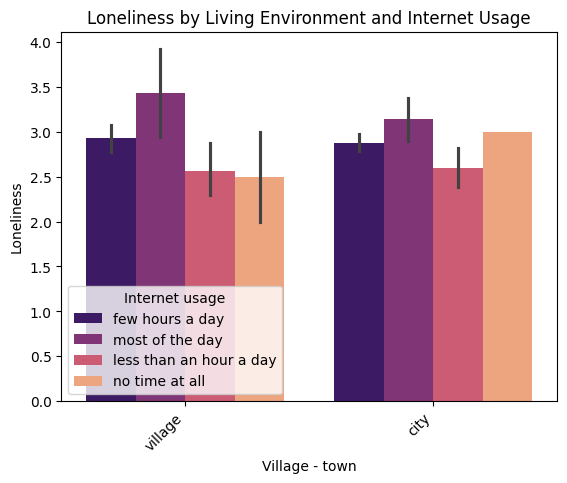

In [73]:
sns.barplot(data=df, x='Village - town', y='Loneliness', hue='Internet usage', palette='magma')
plt.title('Loneliness by Living Environment and Internet Usage')

plt.xticks(rotation=45, ha='right')
plt.show()

The data seems almost uniform

## 2.2 Multivariate Analysis

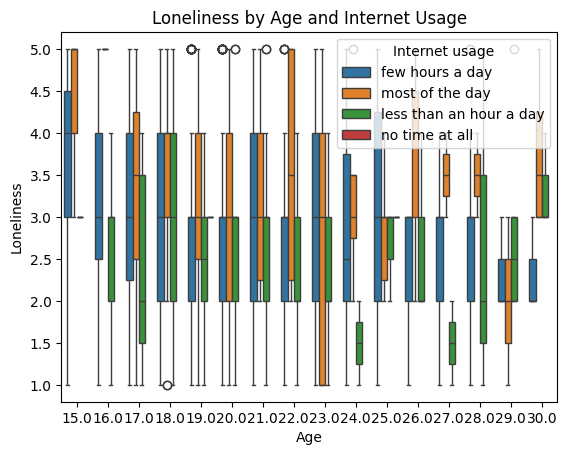

In [74]:
sns.boxplot(data=df, x='Age', y='Loneliness', hue='Internet usage')
plt.title('Loneliness by Age and Internet Usage')
plt.show()

^Looking for the most extremes:  
Age-15 who spend most of the day on the internet have a concentrated distribution at the highest Loneliness range. Meanwhile, Age-24 and Age-27 who spends < 1 hour on the internet have a concentrated distribution at the opposite side of the Loneliness range.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


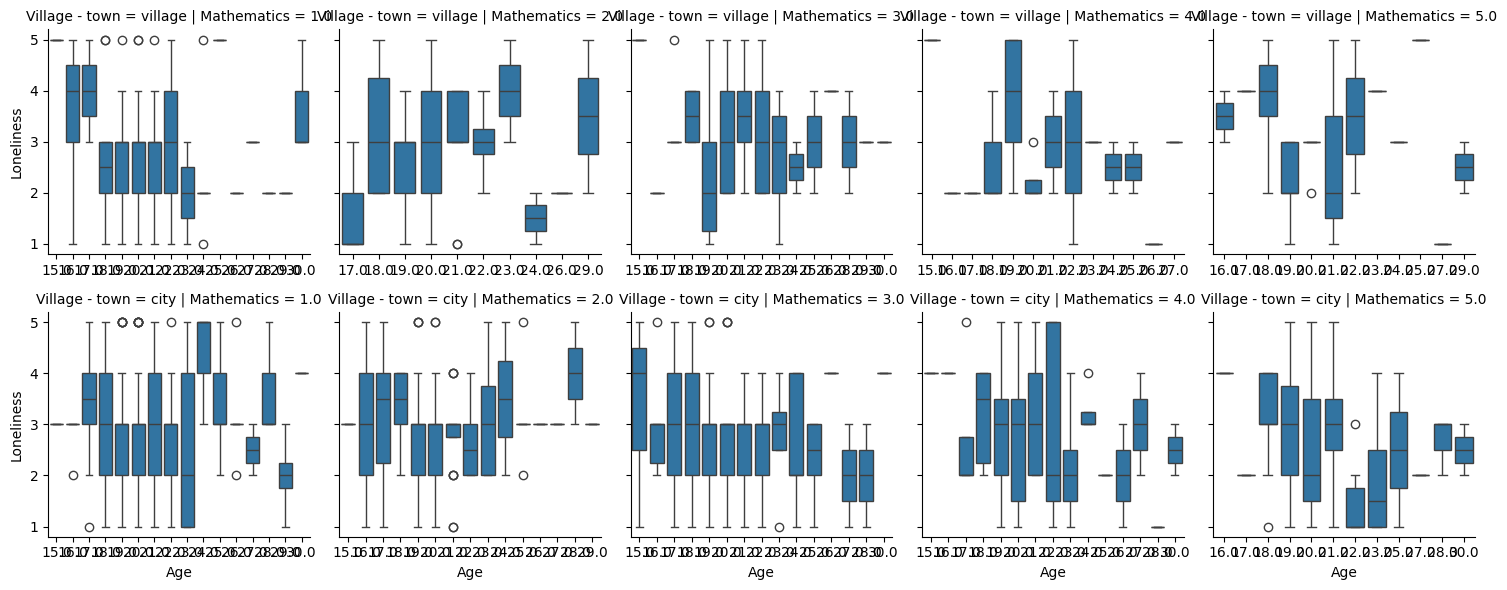

In [75]:
g = sns.FacetGrid(df, row='Village - town', col='Mathematics', sharex=False)
g.map(sns.boxplot, 'Age', 'Loneliness')

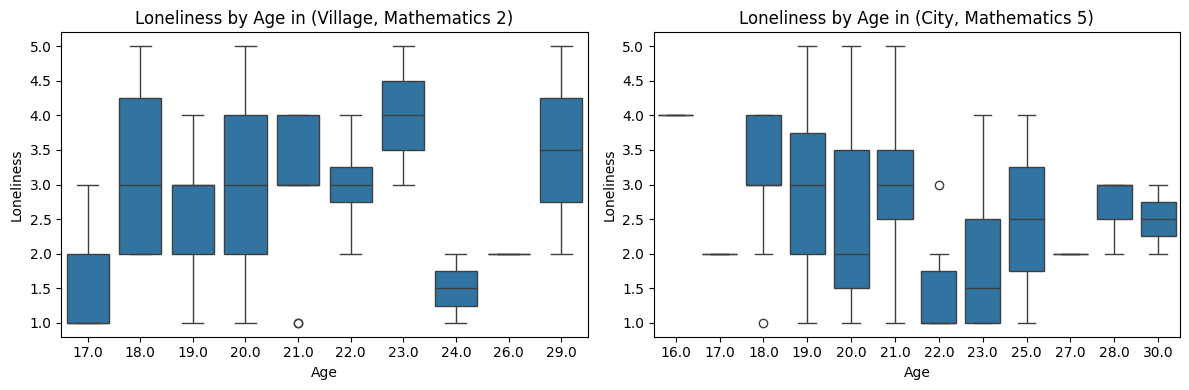

In [76]:
village_math_2 = df[(df['Village - town'] == 'village') & (df['Mathematics'] == 2)]
city_math_5 = df[(df['Village - town'] == 'city') & (df['Mathematics'] == 5)]

fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(data=village_math_2, x='Age', y='Loneliness', ax=ax[0])
ax[0].set_title('Loneliness by Age in (Village, Mathematics 2)')

sns.boxplot(data=city_math_5, x='Age', y='Loneliness', ax=ax[1])
ax[1].set_title('Loneliness by Age in (City, Mathematics 5)')

plt.tight_layout()

(2 figures to give references of comparison, but the 2nd one to show a proper view)  
Interestingly, these groups have a concentrated distribution on an extremely low end of Loneliness: Villagers who rated Mathematics as 2, and City-ers who rated Mathematics as 5-- around the same age range (24 and 22, respectively).

## 2.3 Correlation Analysis

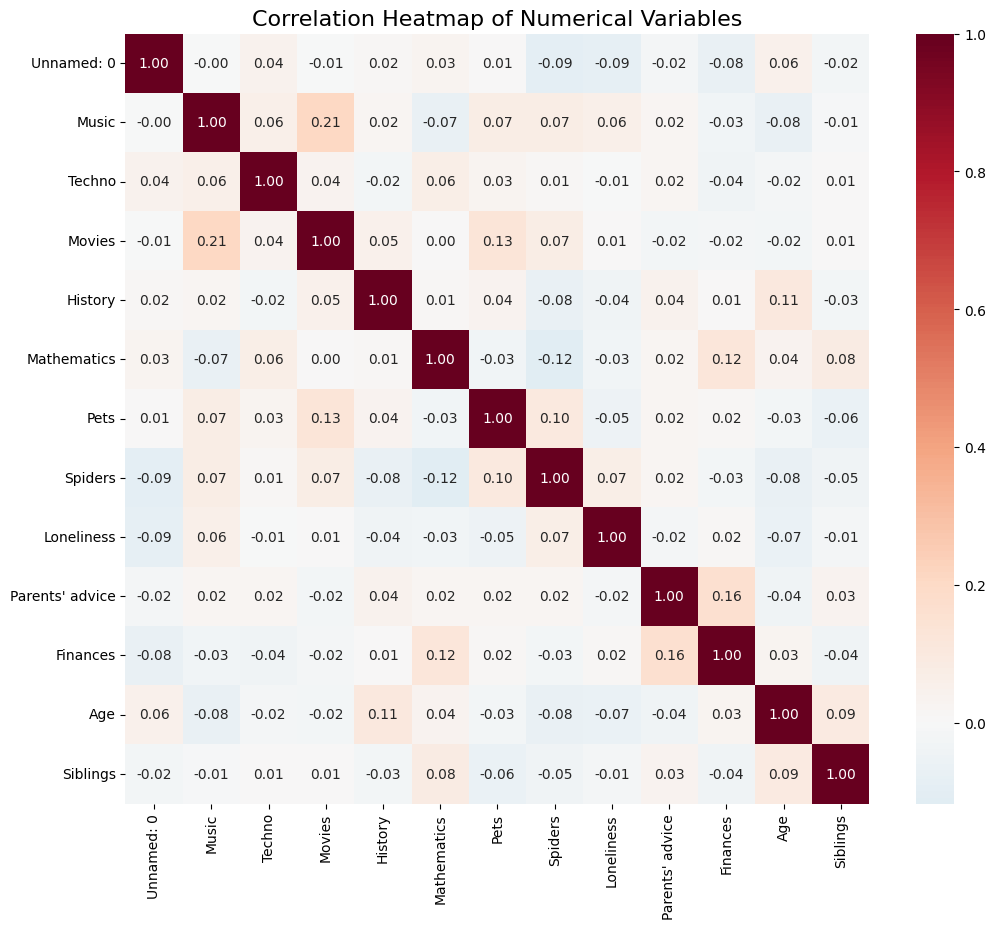

In [77]:
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r', center=0)

plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()


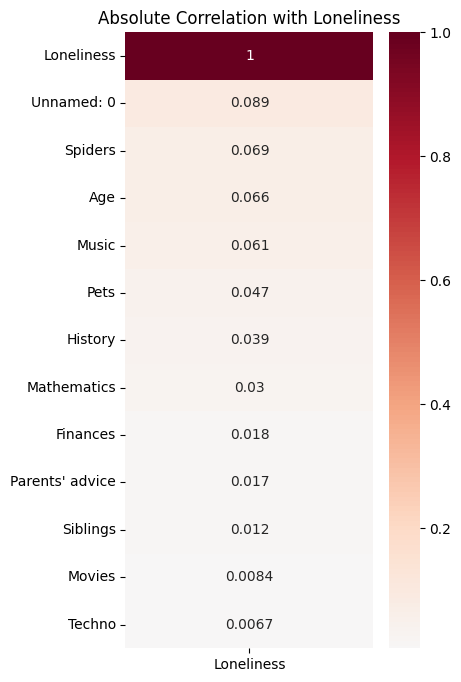

In [78]:
# Sort correlations to see the strongest relationships at the top
loneliness_corr = abs(corr_matrix[['Loneliness']]).sort_values(by='Loneliness', ascending=False)

plt.figure(figsize=(4, 8))
sns.heatmap(loneliness_corr, annot=True, cmap='RdBu_r', center=0)
plt.title('Absolute Correlation with Loneliness')
plt.show()

As you can see, the variables have very low correlations to the target variable, as well as to each other. Due to this low correlations, I'd say the concern of multicollinearity is little to none.  

Just in case, I performed an ANOVA test on the categorical variables. Internet usage seems to be very significant, followed by Gender (p-score).  

In [79]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# We use a formula: Loneliness is predicted by Village_town
# Note: Use the column names exactly as they appear in your dataframe
model = ols('Loneliness ~ Q("Village - town")', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

model = ols('Loneliness ~ Q("Internet usage")', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

model = ols('Loneliness ~ Q("Gender")', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                          sum_sq      df         F    PR(>F)
Q("Village - town")     0.526555     1.0  0.410116  0.522057
Residual             1287.767972  1003.0       NaN       NaN
                          sum_sq      df         F    PR(>F)
Q("Internet usage")    27.249144     3.0  7.222624  0.000085
Residual             1263.870776  1005.0       NaN       NaN
                  sum_sq      df         F    PR(>F)
Q("Gender")     5.452717     1.0  4.292942  0.038527
Residual     1271.428639  1001.0       NaN       NaN


## 2.4 Key Findings Summary

Maybe I'm doing something terribly wrong, but none of the variables have any significant correlation. In fact, the variable that had the most (absolute value) correlation was the 'Unnamed: 0' column that I dropped. I found this out while playing with the data. The correlations were all < 0.1 (the highest from the Unnamed column was 0.08889521). That being said, Internet Usage and Gender had promising p-scores in the ANOVA test.    

I found it the most interesting that the 'Loneliness by Internet Usage and Living Environment' boxplot somewhat showed variance between the groups. Most of the other graphs had so little variation-- which probably explained the low correlations all across the board. I identified skewness in Music, Techno, Movies, and Siblings. The Siblings column actually had a very impressive outlier: 10.

#**Part 3: Data Preprocessing**

## 3.1 Feature Selection

In [80]:
# Select only the object/category columns and drop the rest
df_only_categorical = df.select_dtypes(exclude=['number'])

print("Numerical variables removed. Remaining columns:")
print(df_only_categorical.columns)

Numerical variables removed. Remaining columns:
Index(['Internet usage', 'Gender', 'Village - town'], dtype='object')


| Variable Name | Reason for Removal |
|---|---|
|Unnamed: 0|Unique identifier/indexing variable|  
|All numerical variables| Low correlation score|  

All the numerical variables had extremely low correlations, so I think including them in 1 row is appropriate as they share the same reason


**FEATURE COUNT**  
Before: 16  
After: 3  

##3.2 Handling Missing Values

In [81]:
# Summary table of missing values per kept column in %
df_only_categorical.isnull().sum() / len(df) * 100

,0
Internet usage,0.000000
Gender,0.594059
Village - town,0.396040


/tmp/ipython-input-3709719237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_pct.values, y=missing_pct.index, palette='viridis')


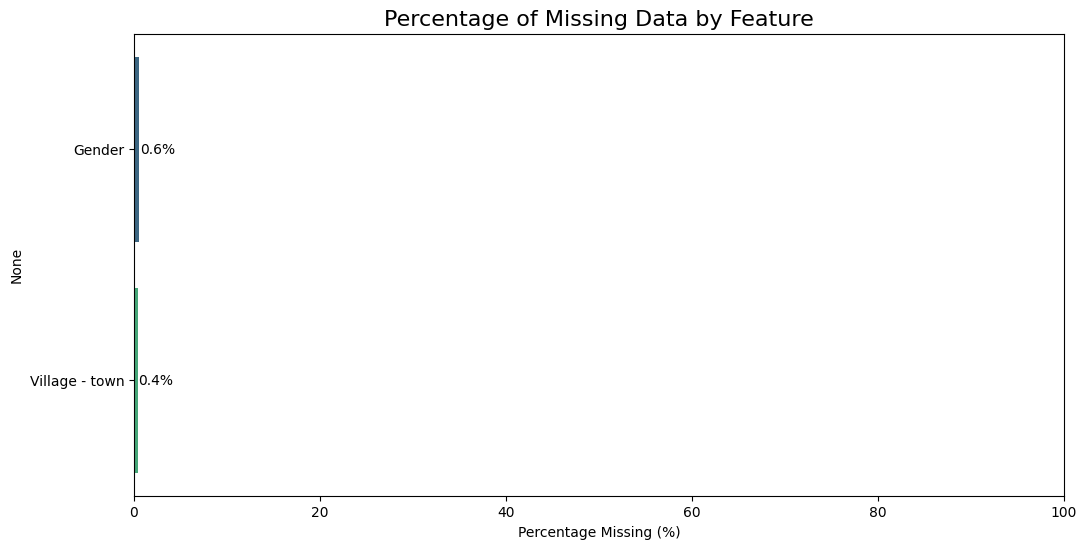

In [82]:
# Calculate percentage
missing_pct = (df_only_categorical.isnull().sum() / len(df)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=missing_pct.values, y=missing_pct.index, palette='viridis')

for i, p in enumerate(missing_pct.values):
    ax.annotate(f'{p:.1f}%', (p + 0.1, i), va='center')

plt.title('Percentage of Missing Data by Feature', fontsize=16)
plt.xlabel('Percentage Missing (%)')
plt.xlim(0, 100)
plt.show()

There are very little missing values

Despite few missing values, I already removed every variable that weren't the categorical variables due to their correlation scores.

**FEATURE COUNT**  
Before: 3  
After: 3  

**Imputation Strategy Table**  
| Name | Type | % missing | Method | Justification |
|-|-|-|-|-|
|Gender|One-hot|0.6%| Mode | Categorical, and very few missing values|
|Village - town|One-hot|0.4%|Mode|Categorical, and very few missing values|
|Loneliness|Numerical|1/1010|Mean|Numerical, normal, and very few missing values  


In [83]:
## Before
df_only_categorical.isnull().sum()

,0
Internet usage,0
Gender,6
Village - town,4


In [102]:
df['Loneliness'].isnull().sum()

np.int64(1)

In [103]:
## After
df_only_categorical['Gender'] = df_only_categorical['Gender'].fillna(df_only_categorical['Gender'].mode()[0])
df_only_categorical['Village - town'] = df_only_categorical['Village - town'].fillna(df_only_categorical['Village - town'].mode()[0])
df['Loneliness'] =df['Loneliness'].fillna(df['Loneliness'].mean())
df_only_categorical.isnull().sum()

,0
Internet usage,0
Gender,0
Village - town,0


In [104]:
df['Loneliness'].isnull().sum()

np.int64(0)

##3.3 Encoding Categorical Variables

In [87]:
# Before
df_only_categorical.columns
print("Feature count: ", len(df_only_categorical.columns))

Feature count:  3


| Name | Type | Method | Justification | Resulting Columns |
| - | - | - | - | - |
|Gender| Nominal|One-hot|No inherent order|1 column (2-1 options)|
|Internet usage| Ordinal|Ordinal|There is a sense of sequence|1 column|
|Village - town|Nominal|One-hot|No inherent order|1 column|

In [91]:
# After
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

usage_order = ['no time at all', 'less than an hour a day', 'few hours a day', 'most of the day']

preprocessor = ColumnTransformer(transformers=[
    ('ord', OrdinalEncoder(categories=[usage_order]), ['Internet usage']),
    ('nom', OneHotEncoder(drop='first', sparse_output=False), ['Gender', 'Village - town'])
], remainder='passthrough')

encoded_data = preprocessor.fit_transform(df_only_categorical)
new_cols = preprocessor.get_feature_names_out()
df_only_categorical_encoded = pd.DataFrame(encoded_data, columns=new_cols)

df_only_categorical_encoded.head()

,ord__Internet usage,nom__Gender_male,nom__Village - town_village
0,2.0,0.0,1.0
1,2.0,0.0,0.0
2,2.0,0.0,0.0
3,3.0,0.0,0.0
4,2.0,0.0,1.0


In [94]:
# After
df_only_categorical_encoded.columns
print("Feature count: ", len(df_only_categorical_encoded.columns))

Feature count:  3


#**Part 4: Cross Validation**

Train-test ratio: 80-20  
Random_state: 1  

Standard ratios (and it splits without rounding errors), and 1 for random_state for simplicity

|Dataset|Samples|Features|% of Total|
|-|-|-|-|
|Training|808|3|80%|
|Testing|202|3|20%

In [98]:
from sklearn.model_selection import train_test_split

X = df_only_categorical_encoded
y = df['Loneliness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print(f"Total dataset rows: {len(df_only_categorical_encoded)}")
print(f"Training set rows: {X_train.shape[0]} ({X_train.shape[0]/len(df_encoded):.0%})")
print(f"Testing set rows:  {X_test.shape[0]} ({X_test.shape[0]/len(df_encoded):.0%})")


Total dataset rows: 1010
Training set rows: 808 (80%)
Testing set rows:  202 (20%)


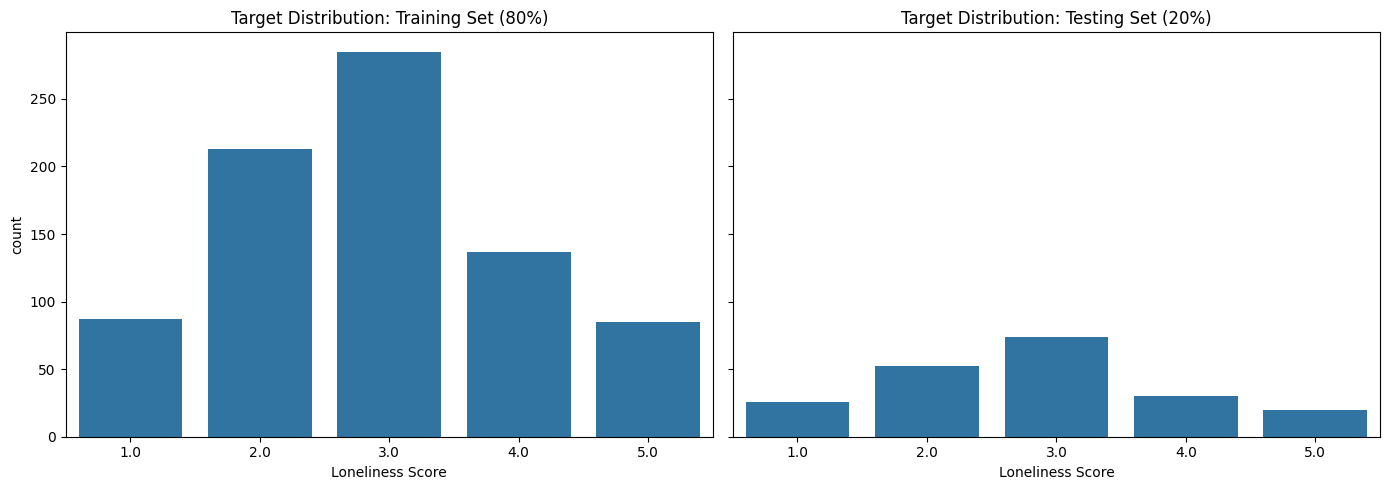

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Training Set
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Target Distribution: Training Set (80%)')
axes[0].set_xlabel('Loneliness Score')

# Testing Set
sns.countplot(x=y_test, ax=axes[1])
axes[1].set_title('Target Distribution: Testing Set (20%)')
axes[1].set_xlabel('Loneliness Score')

plt.tight_layout()
plt.show()

#**Part 5: Feature Scaling**

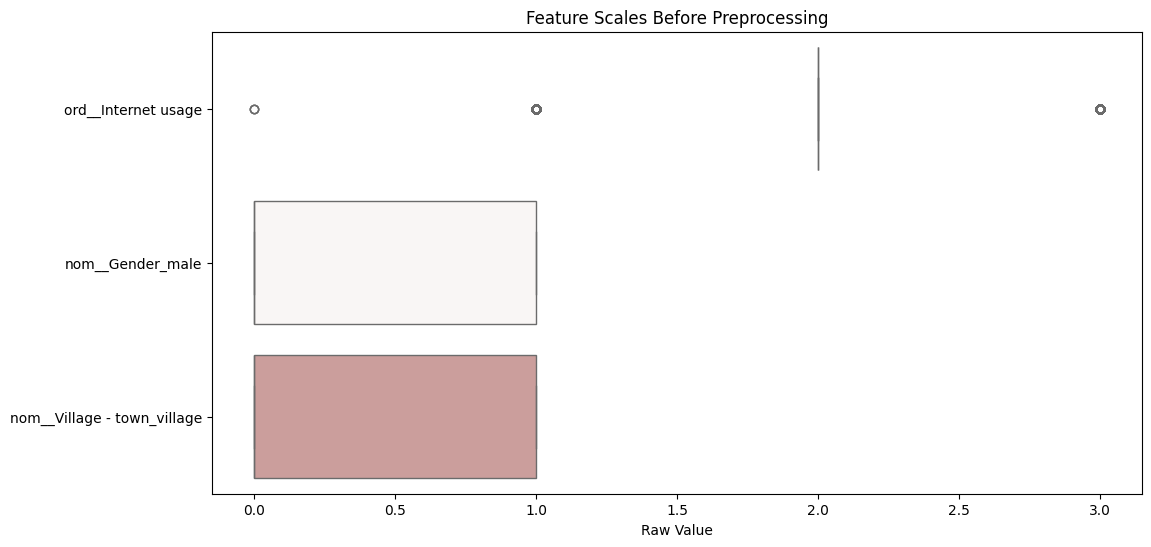

In [100]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_only_categorical_encoded, orient='h', palette='vlag')
plt.title('Feature Scales Before Preprocessing')
plt.xlabel('Raw Value')
plt.show()

Unsurprisingly, due to all the kept columns being categorical, they're roughly all at the same scale.  

In the other code file, I did still experiment with the numerical columns. I ended up scaling the Age column as it was significantly higher than other variables' intervals

#**Part 7: Summary and Reflection**

**Processing Summary Table**  
|Preprocessing Step|Initial|Final|Change|
|-|-|-|-|
|Samples|1010|1010|0|
|Features|16|4(3 categorical + 1 for target)|-12|
|Missing Values|11 (from the only kept columns & Loneliness)|0|100%|

The correlation tests from the EDA were the most important to me. Before I tested the scores, I did notice that graphs involving the categorical variables had the most variation (although it wasn't a lot).  

Normally, the most challenging aspect of preprocessing is handling missing data. The strategy to whether replace or drop them is a step, and if you choose to replace them, you'll also have to decide how you will impute the missing data. For this dataset, though, there was virtually no missing data. However, the correlations were so low all across most of the board.  

My concern is that there just may be too many categorical variables vs. numerical-ish variables (Gender, Village vs. Internet usage). But I don't think this outcome is extremely surprising--that those are the most relevant variables.  